In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [57]:
# Load dataset
df = pd.read_csv('./Data/Housing.csv')
df = df.dropna()
df.head(50)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [58]:
df.drop(columns=['bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus'])

,price,area
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420
...,...,...
540,1820000,3000
541,1767150,2400
542,1750000,3620
543,1750000,2910


In [59]:
def loss_function(m, b, points):
    total_error = 0
    for i in range(len(points)):
        x = points.iloc[i].CGPA
        y = points.iloc[i].ChanceofAdmit
        total_error += (y - (m * x + b)) ** 2
    total_error / float(len(points))

In [60]:
def gradient_descent(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient = 0

    n = len(points)

    for i in range(n):
        x = points.iloc[i].price
        y = points.iloc[i].area
        m_gradient += -(2 / n) * x * (y - (m_now * x - b_now))
        b_gradient += -(2 / n) * (y - (m_now * x - b_now))

    m = m_now - m_gradient * L
    b = b_now - b_gradient * L
    return m, b

In [61]:
m = 0
b = 0
L = 0.0001
epochs = 50
for i in range(epochs):
    if i % 500 == 0:
        print(f'epochs = {i}')
    m, b = gradient_descent(m, b, df, L)
print(m, b)

epochs = 0


C:\Users\Acer\AppData\Local\Temp\ipykernel_25512\2984077753.py:10: RuntimeWarning: overflow encountered in scalar multiply
  m_gradient += -(2 / n) * x * (y - (m_now * x - b_now))
C:\Users\Acer\AppData\Local\Temp\ipykernel_25512\2984077753.py:13: RuntimeWarning: invalid value encountered in scalar subtract
  m = m_now - m_gradient * L


nan nan


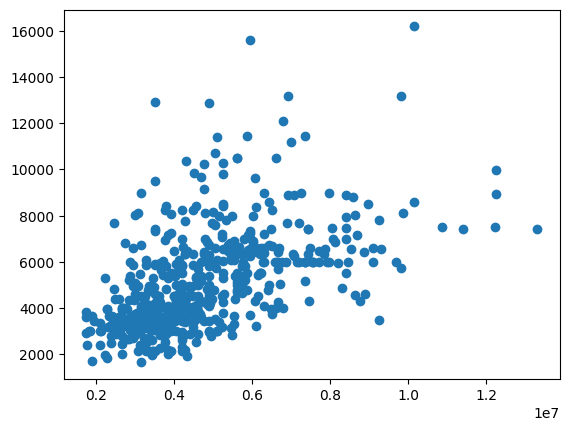

In [62]:
plt.scatter(df.price, df.area)
plt.plot(list(range(1,10)), [m * x + b for x in range(1,10)], color = "red")
plt.show()